In [6]:
#Import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Read the data present in dataset
data = pd.read_csv("Kerala-Rainfall-Historical.csv")
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,floods
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,YES
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,YES
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,YES
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,YES
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,NO


In [10]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,12.171795,15.374359,37.127350,109.419658,229.983761,653.164957,695.979487,420.692308,245.861538,291.941880,162.558974,39.980342,2914.247009,27.541026,376.515385,2015.688034,494.484615
std,33.919021,15.428164,16.127841,30.460281,45.169247,148.010937,186.222721,226.570097,159.340480,123.265815,95.056246,83.733559,36.819956,430.293104,22.222554,149.911887,388.179311,132.033245
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,1870.900000,0.300000,89.900000,1104.300000,166.600000
25%,1930.000000,2.400000,4.700000,18.100000,71.500000,124.500000,541.700000,532.000000,315.300000,150.100000,221.600000,92.900000,10.200000,2621.700000,10.300000,277.800000,1749.200000,406.500000
50%,1959.000000,6.000000,8.400000,28.300000,108.400000,190.600000,625.800000,687.300000,385.200000,223.900000,282.600000,153.000000,31.100000,2931.100000,20.500000,342.000000,1947.500000,500.800000
75%,1988.000000,16.900000,21.400000,50.100000,135.100000,265.400000,788.500000,831.600000,495.000000,335.600000,354.100000,219.100000,54.100000,3151.500000,40.600000,436.900000,2231.200000,584.000000
max,2017.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1199.200000,526.700000,567.900000,365.600000,202.300000,4257.800000,98.100000,915.200000,3451.300000,823.300000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 117 entries, 0 to 116

Data columns (total 20 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   SUBDIVISION  117 non-null    object 

 1   YEAR         117 non-null    int64  

 2   JAN          117 non-null    float64

 3   FEB          117 non-null    float64

 4   MAR          117 non-null    float64

 5   APR          117 non-null    float64

 6   MAY          117 non-null    float64

 7   JUN          117 non-null    float64

 8   JUL          117 non-null    float64

 9   AUG          117 non-null    float64

 10  SEP          117 non-null    float64

 11  OCT          117 non-null    float64

 12  NOV          117 non-null    float64

 13  DEC          117 non-null    float64

 14  ANNUAL       117 non-null    float64

 15  JF           117 non-null    float64

 16  MAM          117 non-null    float64

 17  JJAS         117 non-null    float64

 18  OND          117 non-null  

In [14]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
floods         0
dtype: int64

In [24]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['floods'].replace(['YES','NO'],[1,0],inplace=True)

In [26]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,floods
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,1
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,1
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,0


In [28]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
floods         0
dtype: int64

In [30]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [32]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: floods, dtype: int64

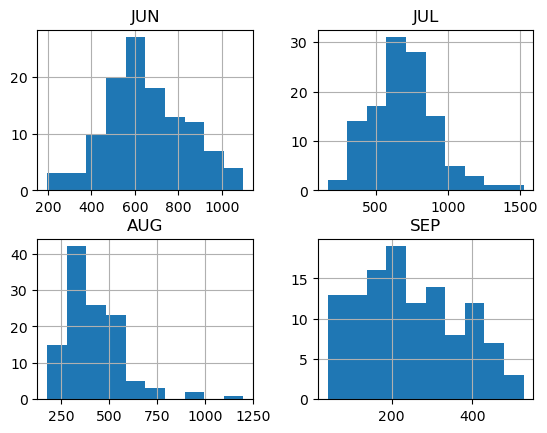

In [34]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [35]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00862069, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01724138, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98275862, 0.03712575, 0.07341772, ..., 0.47977573, 0.57497755,
        0.39218595],
       [0.99137931, 0.03592814, 0.20759494, ..., 0.07328795, 0.07901826,
        0.10830861],
       [1.        , 0.15209581, 0.00379747, ..., 0.31938326, 0.36096977,
        0.30316518]])

In [36]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
59,1960,9.4,8.4,44.4,206.6,540.0,480.3,750.9,336.8,371.2,255.9,358.0,23.7
54,1955,4.2,6.3,28.2,125.9,544.2,782.4,392.8,236.0,438.5,378.2,178.1,19.8
107,2008,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0


In [42]:
y_train.head()

0      1
2      1
59     1
54     1
107    0
Name: floods, dtype: int64

In [44]:
##KNN Classifier

In [46]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [48]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood

[1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0]


In [50]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:

15     0

95     0

112    1

96     1

5      0

44     0

9      0

78     0

91     1

103    0

42     1

57     0

104    1

71     0

105    1

24     1

37     0

94     0

72     0

36     0

8      1

13     0

60     1

88     0

Name: floods, dtype: int64


In [52]:
from sklearn.model_selection import cross_val_score

In [54]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()

0.6666666666666666

In [55]:
2.##Logistic Regression

2.0

In [56]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [58]:
lr_accuracy.mean()

0.6666666666666666

In [59]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood

[1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


In [60]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood

[0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


In [61]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))



accuracy score: 91.666667

recall score: 100.000000

roc score: 93.333333


In [62]:
3.##. Decision tree classification

3.0

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.61290323, 0.70967742, 0.61290323])

In [64]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1]


In [68]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:

[0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


In [69]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))



accuracy score:66.666667

recall score:66.666667

roc score:66.666667


In [70]:
4.##. Random Forest Classification

4.0

In [71]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [72]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [73]:
rmf_clf_acc

array([0.77419355, 0.70967742, 0.80645161])

In [74]:
y_pred = rmf_clf.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))



accuracy score:87.500000

recall score:77.777778

roc score:85.555556


In [76]:
5.##.Enseble Learning

5.0

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [84]:
voting_clf = voting.fit(x_train, y_train)

In [85]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8333333333333334

RandomForestClassifier 0.75

KNeighborsClassifier 0.7083333333333334

VotingClassifier 0.8333333333333334


In [86]:
####Comparing all the prediction models####

In [102]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\prade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


  Name     Score

0  KNN  0.708333

1   LR  0.833333

2   DT  0.625000

3   RF  0.750000

4   EL  0.833333


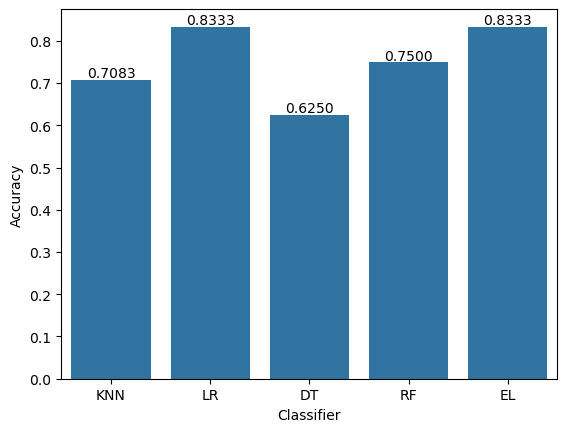

In [104]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()